In [ ]:
import pandas as pd
import torch
from torch import nn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import requests

**Глобальные переменные:**

---

* LR - Learning rate - скорость обучения модели
* EPOCHS - количество эпох для обучения

---


In [ ]:
LR = 0.01
EPOCHS = 100

sns.set_palette('magma')
torch.manual_seed(17)

# Задание 1: Загрузите данные

**Загрузка данных**

---



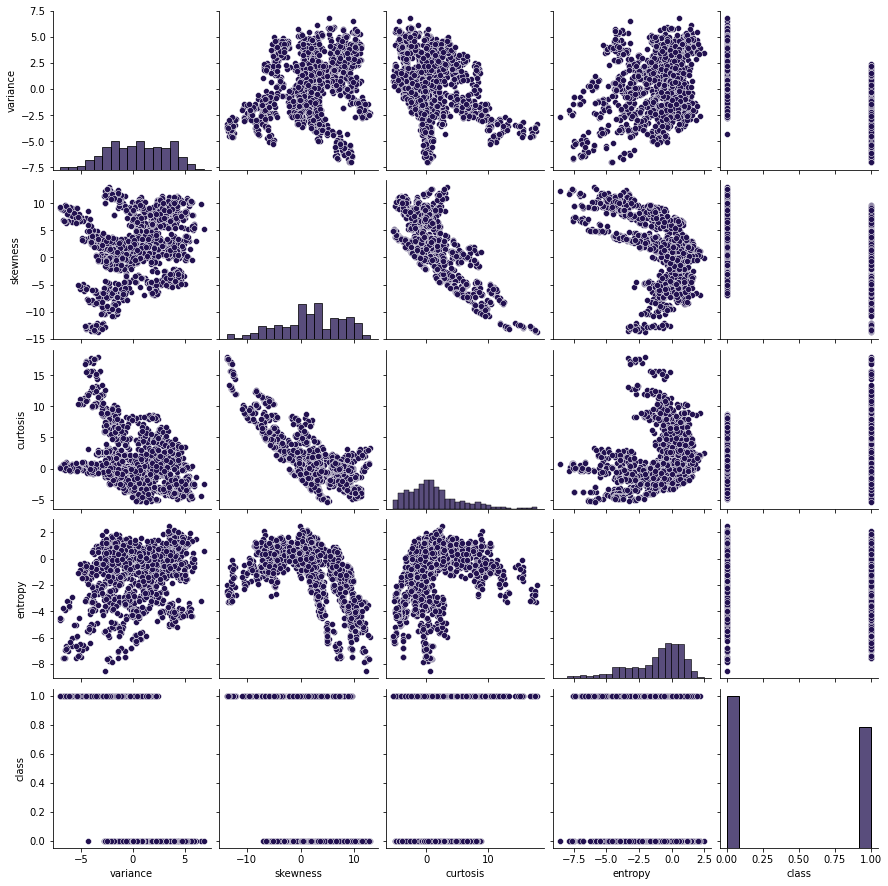

In [ ]:
#Загружаем файл с данными
data_url = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')
with open('data_file.csv', 'w') as f:
  f.write(data_url.content.decode("utf-8"))

#Загружаем данные в датафрейм
data = pd.read_csv('data_file.csv', names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'])
sns.pairplot(data)

**Проверка на отсутствующие значения**

---

In [ ]:
data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

**Разделение данных на обучающую и тестовую выборки**

---

In [ ]:
X, y = data[['variance', 'skewness', 'curtosis', 'entropy']].values, data['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=17)

X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

# Задание 2: Реализовать модель логистической регрессии со следующими функциями потерь:
*  Logistic loss
*  Adaboost loss
*  binary crossentropy

**Создаём модель логистической регрессии с нелинейной функцией активации (ReLU), так как между данными преобладает нелинейная зависимость**

---

In [ ]:
class LogisticRegressor(nn.Module):
  def __init__(self, input_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=1),
    )

  def forward(self, x):
    return torch.sigmoid(self.model(x))

**Логистическая функция потерь и функция потерь Adaboost**

---

In [ ]:
def LogLoss(y, f):
  return torch.mean(torch.log(1+torch.exp(-y*f)))

def AdaboostLoss(y, f):
  return torch.mean(torch.exp(-y*f))

**Определяем и инициализируем модели, функции потерь и оптимизаторы**

---

In [ ]:
model_for_log_loss = LogisticRegressor(input_features=X.shape[1])
model_for_adaboost_loss = LogisticRegressor(input_features=X.shape[1])
model_for_bce_loss = LogisticRegressor(input_features=X.shape[1])

loss_fn1 = LogLoss
loss_fn2 = AdaboostLoss
loss_fn3 = nn.BCELoss()

optimizer1 = torch.optim.Adam(model_for_log_loss.parameters(), lr=LR)
optimizer2 = torch.optim.Adam(model_for_adaboost_loss.parameters(), lr=LR)
optimizer3 = torch.optim.Adam(model_for_bce_loss.parameters(), lr=LR)

**Обучаем модели и фиксируем значения функций потерь на каждой эпохе**

---

In [ ]:
log_loss_score = []

for epoch in range(EPOCHS):
  optimizer1.zero_grad()
  preds = torch.squeeze(model_for_log_loss(X_train))
  loss = loss_fn1(preds, y_train)

  log_loss_score.append(loss.item())

  loss.backward()
  optimizer1.step()

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}")


Epoch: 0, Loss: 0.6024332642555237
Epoch: 10, Loss: 0.5376272797584534
Epoch: 20, Loss: 0.5247576832771301
Epoch: 30, Loss: 0.5228213667869568
Epoch: 40, Loss: 0.5223608613014221
Epoch: 50, Loss: 0.5222129821777344
Epoch: 60, Loss: 0.5221503376960754
Epoch: 70, Loss: 0.522117018699646
Epoch: 80, Loss: 0.5220963954925537
Epoch: 90, Loss: 0.5220820903778076


In [ ]:
adaboost_loss_score = []

for epoch in range(EPOCHS):
  optimizer2.zero_grad()
  preds = torch.squeeze(model_for_adaboost_loss(X_train))
  loss = loss_fn2(preds, y_train)

  adaboost_loss_score.append(loss.item())
  loss.backward()
  optimizer2.step()

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}")
  


Epoch: 0, Loss: 0.8256204128265381
Epoch: 10, Loss: 0.7336276173591614
Epoch: 20, Loss: 0.7173535227775574
Epoch: 30, Loss: 0.7156519889831543
Epoch: 40, Loss: 0.7153855562210083
Epoch: 50, Loss: 0.7153184413909912
Epoch: 60, Loss: 0.7152940034866333
Epoch: 70, Loss: 0.7152820825576782
Epoch: 80, Loss: 0.7152748107910156
Epoch: 90, Loss: 0.7152697443962097


In [ ]:
bce_loss_score = []

for epoch in range(EPOCHS):
  optimizer3.zero_grad()
  preds = torch.squeeze(model_for_bce_loss(X_train))
  loss = loss_fn3(preds, y_train)
 
  bce_loss_score.append(loss.item())

  loss.backward()
  optimizer3.step()

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}")


Epoch: 0, Loss: 0.709373414516449
Epoch: 10, Loss: 0.3194095492362976
Epoch: 20, Loss: 0.11642995476722717
Epoch: 30, Loss: 0.03761615604162216
Epoch: 40, Loss: 0.01351152453571558
Epoch: 50, Loss: 0.006785137113183737
Epoch: 60, Loss: 0.004060008097440004
Epoch: 70, Loss: 0.002823363756760955
Epoch: 80, Loss: 0.002115097129717469
Epoch: 90, Loss: 0.0016591481398791075


# Задание 3: Визуализировать кривые обучения модели бинарной классификации в виде динамики изменения каждой из функций ошибок

**Визуализируем кривые функций потерь**

---

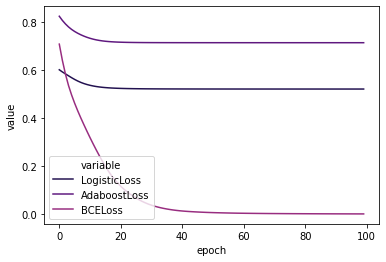

In [ ]:
results = pd.DataFrame(data={
                              'epoch': range(EPOCHS), 
                              'LogisticLoss': log_loss_score, 
                              'AdaboostLoss': adaboost_loss_score,
                              'BCELoss': bce_loss_score
                            })

sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results, ['epoch']))

# Задание 4: Сравнить качество классификации по метрике accuracy в каждом из трёх модификаций алгоритма

In [ ]:
accuracy = []
with torch.no_grad():
  accuracy.append(accuracy_score(y_test, model_for_log_loss(X_test).round()))
  accuracy.append(accuracy_score(y_test, model_for_adaboost_loss(X_test).round()))
  accuracy.append(accuracy_score(y_test, model_for_bce_loss(X_test).round()))

accuracy_df = pd.DataFrame({'accuracy': accuracy}, index=['Модель с log loss', 'Модель с adaboost loss', 'Модель с BCE loss'])
accuracy_df

,accuracy
Модель с log loss,0.432671
Модель с adaboost loss,0.432671
Модель с BCE loss,1.000000
